In [2]:
import numpy as np
import pandas as pd
from PIL import Image as pilImg
import os 
import cv2
from datetime import datetime
import matplotlib.pyplot as plt
import itertools
import random
import datetime

In [26]:
def get_image_filenames(root_folder):
    image_filenames = []
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                image_filenames.append(filename)

    return image_filenames


In [27]:
root_folder = 'C:\\Users\\Saurabh Bhite\\mnt\\ramdisk\\max\\90kDICT32px'
image_filenames = get_image_filenames(root_folder)


All_img= pd.DataFrame(image_filenames, columns=['Image_Filename'])

All_img.head()


Image_Filename
0  100_Classmates_13991.jpg
1     101_greater_33598.jpg
2    102_BULLFROG_10132.jpg
3     103_NUCLEAR_52503.jpg
4  104_maximilian_47254.jpg

In [28]:
All_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8919273 entries, 0 to 8919272
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Image_Filename  object
dtypes: object(1)
memory usage: 68.0+ MB


In [29]:
All_img.nunique()

Image_Filename    8622562
dtype: int64

In [30]:
All_img.value_counts()

Image_Filename           
494_scaremonger_68163.jpg    5
5_bakersfield_5556.jpg       4
61_Malaysia_46240.jpg        4
90_Audibility_4790.jpg       4
10_lavishing_43628.jpg       4
                            ..
249_GARAGES_31720.jpg        1
249_GANNET_31702.jpg         1
249_GANGPLANK_31686.jpg      1
249_GAMINESS_31660.jpg       1
9_zurich_88160.jpg           1
Length: 8622562, dtype: int64

In [31]:
All_img = All_img.drop_duplicates() 


In [32]:
All_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8622562 entries, 0 to 8919272
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Image_Filename  object
dtypes: object(1)
memory usage: 131.6+ MB


In [33]:
All_img.tail()

Image_Filename
8919268  5_MCPHERSON_47368.jpg
8919269  6_WELLPOINT_86012.jpg
8919270  7_outplayed_54126.jpg
8919271    8_TYPHOON_81508.jpg
8919272     9_RANCOR_62351.jpg

In [34]:
All_img['Image_Filename'].isnull().sum()

0

In [35]:
All_img = All_img.reset_index(drop=True)

In [36]:
All_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622562 entries, 0 to 8622561
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Image_Filename  object
dtypes: object(1)
memory usage: 65.8+ MB


In [37]:
def annotation_file(file_path):
    with open(file_path) as f:
        file_names = f.readlines()
    images_names = ['C:/Users/Saurabh Bhite/mnt/ramdisk/max/' + x.strip() for x in file_names]
    
    return images_names




In [38]:
def annotation_file_Val_Test(file_path):
    with open(file_path) as f:
        file_names = f.readlines()
    images_names = ['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px' + x.strip() for x in file_names]
    
    return images_names




In [14]:
def Get_file_names(file_names):
    clean_files=[]
    for F in file_names:
        main_folder,img_loc,extension=F.split('.')
        extension,_=extension.split(' ')
        img_file=main_folder+img_loc+'.'+extension
        clean_files.append(img_file)
    return clean_files

In [12]:
def Labels_extract(files):
    txt_labels=[]
    for file in files:
        folder,Label,image=file.split('_')
        Label=Label.upper()
        txt_labels.append(Label)
    return txt_labels        

In [13]:
def extract_filenames(data):
    return [path.split('/')[-1] for path in data]



# Preprocessing Train Data 

In [42]:
Train_data=annotation_file("C:\\Users\\Saurabh Bhite\\mnt\\ramdisk\\max\\90kDICT32px\\annotation_train.txt")

In [43]:
Train_data[:10]

['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/115_Lube_45484.jpg 45484',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/114_Spencerian_73323.jpg 73323',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/113_accommodatingly_613.jpg 613',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/112_CARPENTER_11682.jpg 11682',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/111_REGURGITATING_64100.jpg 64100',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/110_savannas_67969.jpg 67969',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/109_unfix_82473.jpg 82473',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/108_CAGOULES_10765.jpg 10765',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/107_TRANSITS_80259.jpg 80259',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2425/1/106_looped_45230.jpg 45230']

In [44]:
Train_data=Get_file_names(Train_data)

In [45]:
Labels=Labels_extract(Train_data)

In [46]:
Train_data[:5]

['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/115_Lube_45484.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/114_Spencerian_73323.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/113_accommodatingly_613.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/112_CARPENTER_11682.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/111_REGURGITATING_64100.jpg']

In [47]:
type(Train_data)

list

In [48]:
File_name =extract_filenames(Train_data)

In [49]:
Train_data=pd.DataFrame({'Image_File_Path':Train_data,"Labels":Labels,"File_Name":File_name})

In [50]:
Train_data.head()

Image_File_Path           Labels  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...             LUBE   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...       SPENCERIAN   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  ACCOMMODATINGLY   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...        CARPENTER   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...    REGURGITATING   

                     File_Name  
0           115_Lube_45484.jpg  
1     114_Spencerian_73323.jpg  
2  113_accommodatingly_613.jpg  
3      112_CARPENTER_11682.jpg  
4  111_REGURGITATING_64100.jpg

In [51]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7224612 entries, 0 to 7224611
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Image_File_Path  object
 1   Labels           object
 2   File_Name        object
dtypes: object(3)
memory usage: 165.4+ MB


In [52]:
All_img.head()

Image_Filename
0  100_Classmates_13991.jpg
1     101_greater_33598.jpg
2    102_BULLFROG_10132.jpg
3     103_NUCLEAR_52503.jpg
4  104_maximilian_47254.jpg

In [53]:
Train_data = Train_data[Train_data['File_Name'].isin(All_img['Image_Filename'])]


In [54]:
Train_data.head()

Image_File_Path           Labels  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...             LUBE   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...       SPENCERIAN   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  ACCOMMODATINGLY   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...        CARPENTER   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...    REGURGITATING   

                     File_Name  
0           115_Lube_45484.jpg  
1     114_Spencerian_73323.jpg  
2  113_accommodatingly_613.jpg  
3      112_CARPENTER_11682.jpg  
4  111_REGURGITATING_64100.jpg

In [55]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7224612 entries, 0 to 7224611
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Image_File_Path  object
 1   Labels           object
 2   File_Name        object
dtypes: object(3)
memory usage: 220.5+ MB


In [56]:
Train_data = Train_data[['Image_File_Path', 'File_Name', 'Labels']]

In [57]:
Train_data.head()

Image_File_Path  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

                     File_Name           Labels  
0           115_Lube_45484.jpg             LUBE  
1     114_Spencerian_73323.jpg       SPENCERIAN  
2  113_accommodatingly_613.jpg  ACCOMMODATINGLY  
3      112_CARPENTER_11682.jpg        CARPENTER  
4  111_REGURGITATING_64100.jpg    REGURGITATING

In [58]:
Train_data['File_Name'].value_counts()

228_5742z_117.jpg             4
479_freeload_30763.jpg        4
322_tussles_81290.jpg         4
181_underwhelmed_82279.jpg    4
287_Interstices_40388.jpg     4
                             ..
101_pig_57536.jpg             1
102_Beget_6695.jpg            1
103_forsakes_30410.jpg        1
104_Flagon_29278.jpg          1
1_pontifically_58805.jpg      1
Name: File_Name, Length: 7029842, dtype: int64

In [59]:
Train_data = Train_data.drop_duplicates(subset='File_Name', keep='first')


In [60]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029842 entries, 0 to 7224611
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Image_File_Path  object
 1   File_Name        object
 2   Labels           object
dtypes: object(3)
memory usage: 214.5+ MB


In [61]:
Train_data=Train_data.reset_index(drop=True)

In [62]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029842 entries, 0 to 7029841
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Image_File_Path  object
 1   File_Name        object
 2   Labels           object
dtypes: object(3)
memory usage: 160.9+ MB


In [63]:
Train_data.to_csv('Train_data.csv')

# Preprocessing validation Data 

In [64]:
Val_data=annotation_file_Val_Test("C:\\Users\\Saurabh Bhite\\mnt\\ramdisk\\max\\90kDICT32px\\annotation_Val.txt")

In [65]:
Val_data[:5]

['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2697/6/466_MONIKER_49537.jpg 49537',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2697/6/465_Ecclesiastics_24500.jpg 24500',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2697/6/464_FIRESTORM_29099.jpg 29099',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2697/6/463_Psi_60982.jpg 60982',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px./2697/6/462_Repurchases_64997.jpg 64997']

In [66]:
Val_data=Get_file_names(Val_data)

In [67]:
val_Labels=Labels_extract(Val_data)

In [68]:
Val_File_name =extract_filenames(Val_data)

In [69]:
Val_data=pd.DataFrame({'Image_File_Path':Val_data,"Labels":val_Labels,"File_Name":Val_File_name})

In [70]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802734 entries, 0 to 802733
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  802734 non-null  object
 1   Labels           802734 non-null  object
 2   File_Name        802734 non-null  object
dtypes: object(3)
memory usage: 18.4+ MB


In [71]:
Val_data.head()

Image_File_Path         Labels  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...        MONIKER   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  ECCLESIASTICS   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...      FIRESTORM   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...            PSI   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...    REPURCHASES   

                     File_Name  
0        466_MONIKER_49537.jpg  
1  465_Ecclesiastics_24500.jpg  
2      464_FIRESTORM_29099.jpg  
3            463_Psi_60982.jpg  
4    462_Repurchases_64997.jpg

In [72]:
Val_data = Val_data[Val_data['File_Name'].isin(All_img['Image_Filename'])]


In [73]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802734 entries, 0 to 802733
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  802734 non-null  object
 1   Labels           802734 non-null  object
 2   File_Name        802734 non-null  object
dtypes: object(3)
memory usage: 24.5+ MB


In [74]:
Val_data =Val_data[['Image_File_Path', 'File_Name', 'Labels']]


In [75]:
Val_data.head()

Image_File_Path  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

                     File_Name         Labels  
0        466_MONIKER_49537.jpg        MONIKER  
1  465_Ecclesiastics_24500.jpg  ECCLESIASTICS  
2      464_FIRESTORM_29099.jpg      FIRESTORM  
3            463_Psi_60982.jpg            PSI  
4    462_Repurchases_64997.jpg    REPURCHASES

In [76]:
cheak_val = pd.merge(Train_data, Val_data, left_on='File_Name', right_on='File_Name')
cheak_val.head()

Image_File_Path_x  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

                      File_Name        Labels_x  \
0             100_HUE_37191.jpg             HUE   
1          30_mercers_47833.jpg         MERCERS   
2  275_Sustainability_76566.jpg  SUSTAINABILITY   
3     185_Dedications_19894.jpg     DEDICATIONS   
4        164_Nippiest_51732.jpg        NIPPIEST   

                                   Image_File_Path_y        Labels_y  
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...             HUE  
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...         MERCERS  
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  SUSTAINABILITY  
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...     DEDICATIONS  
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...        NIPPIEST

In [77]:
cheak_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43134 entries, 0 to 43133
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Image_File_Path_x  43134 non-null  object
 1   File_Name          43134 non-null  object
 2   Labels_x           43134 non-null  object
 3   Image_File_Path_y  43134 non-null  object
 4   Labels_y           43134 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [78]:
Val_data = Val_data[~Val_data['File_Name'].isin(Train_data['File_Name'])]


In [79]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759600 entries, 0 to 802733
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  759600 non-null  object
 1   File_Name        759600 non-null  object
 2   Labels           759600 non-null  object
dtypes: object(3)
memory usage: 23.2+ MB


In [80]:
Val_data = Val_data.reset_index(drop=True)

In [81]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759600 entries, 0 to 759599
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  759600 non-null  object
 1   File_Name        759600 non-null  object
 2   Labels           759600 non-null  object
dtypes: object(3)
memory usage: 17.4+ MB


In [82]:
cheak_val = pd.merge(Train_data, Val_data, left_on='File_Name', right_on='File_Name')
cheak_val.head()

Empty DataFrame
Columns: [Image_File_Path_x, File_Name, Labels_x, Image_File_Path_y, Labels_y]
Index: []

In [83]:
Val_data.value_counts()

Image_File_Path                                                                      File_Name                  Labels     
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/116_CASTLING_11904.jpg     116_CASTLING_11904.jpg     CASTLING       1
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2608/3/446_abominably_331.jpg     446_abominably_331.jpg     ABOMINABLY     1
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2608/3/436_Beachfront_6373.jpg    436_Beachfront_6373.jpg    BEACHFRONT     1
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2608/3/437_sprints_73800.jpg      437_sprints_73800.jpg      SPRINTS        1
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2608/3/438_varicolored_84061.jpg  438_varicolored_84061.jpg  VARICOLORED    1
                                                                                                                              ..
C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2517/4/260_Extol_27627.jpg        260_Extol_27627.j

In [84]:
Val_data = Val_data.drop_duplicates(subset='File_Name', keep='first')


In [85]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757252 entries, 0 to 759599
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  757252 non-null  object
 1   File_Name        757252 non-null  object
 2   Labels           757252 non-null  object
dtypes: object(3)
memory usage: 23.1+ MB


In [86]:
Val_data=Val_data.reset_index(drop=True)

In [87]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757252 entries, 0 to 757251
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  757252 non-null  object
 1   File_Name        757252 non-null  object
 2   Labels           757252 non-null  object
dtypes: object(3)
memory usage: 17.3+ MB


In [88]:
Val_data.to_csv('Val_data.csv')

#  Preprocessing Test Data 

In [90]:
Test_data=annotation_file_Val_Test("C:\\Users\\Saurabh Bhite\\mnt\\ramdisk\\max\\90kDICT32px\\annotation_test.txt")

In [91]:
Test_data=Get_file_names(Test_data)

In [92]:
Test_data

['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/182_slinking_71711.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/181_REMODELERS_64541.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/180_Chronographs_13538.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/179_Impeaching_38222.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/178_discombobulated_22063.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/177_Loots_45256.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/176_underpays_82187.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/175_flameproofed_29323.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/174_ENTICEMENTS_26024.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/173_Ukase_81594.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/172_DESCANTED_20927.jpg',
 'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDIC

In [93]:
Test_Labels=Labels_extract(Test_data)

In [94]:
Test_File_name =extract_filenames(Test_data)

In [95]:
Test_data=pd.DataFrame({'Image_File_Path':Test_data,"Labels":Test_Labels,"File_Name":Test_File_name})

In [96]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891927 entries, 0 to 891926
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  891927 non-null  object
 1   Labels           891927 non-null  object
 2   File_Name        891927 non-null  object
dtypes: object(3)
memory usage: 20.4+ MB


In [97]:
Test_data.head()

Image_File_Path           Labels  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...         SLINKING   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...       REMODELERS   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...     CHRONOGRAPHS   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...       IMPEACHING   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  DISCOMBOBULATED   

                       File_Name  
0         182_slinking_71711.jpg  
1       181_REMODELERS_64541.jpg  
2     180_Chronographs_13538.jpg  
3       179_Impeaching_38222.jpg  
4  178_discombobulated_22063.jpg

In [98]:
Test_data = Test_data[Test_data['File_Name'].isin(All_img['Image_Filename'])]


In [99]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891927 entries, 0 to 891926
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  891927 non-null  object
 1   Labels           891927 non-null  object
 2   File_Name        891927 non-null  object
dtypes: object(3)
memory usage: 27.2+ MB


In [100]:
cheak_test = pd.merge(Train_data, Test_data, left_on='File_Name', right_on='File_Name')
cheak_test.head()

Image_File_Path_x  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

                   File_Name     Labels_x  \
0   152_Threadiest_78788.jpg   THREADIEST   
1       329_sindhi_71053.jpg       SINDHI   
2   289_PROROGUING_60699.jpg   PROROGUING   
3  227_OVERFLOWING_54481.jpg  OVERFLOWING   
4       99_ALFRESCO_1963.jpg     ALFRESCO   

                                   Image_File_Path_y     Labels_y  
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   THREADIEST  
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...       SINDHI  
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   PROROGUING  
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  OVERFLOWING  
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...     ALFRESCO

In [101]:
Test_data = Test_data[~Test_data['File_Name'].isin(Train_data['File_Name'])]


In [102]:
cheak_test = pd.merge(Train_data, Test_data, left_on='File_Name', right_on='File_Name')
cheak_test.head()

Empty DataFrame
Columns: [Image_File_Path_x, File_Name, Labels_x, Image_File_Path_y, Labels_y]
Index: []

In [103]:
cheak_test2 = pd.merge(Val_data, Test_data, left_on='File_Name', right_on='File_Name')
cheak_test2.head()

Image_File_Path_x                File_Name  \
0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  238_SPEEDWAYS_73293.jpg   
1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   489_Sackfuls_67265.jpg   
2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  242_POPPYCOCK_58885.jpg   
3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  122_UNTWISTED_83386.jpg   
4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...    378_DIOXIDE_21795.jpg   

    Labels_x                                  Image_File_Path_y   Labels_y  
0  SPEEDWAYS  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  SPEEDWAYS  
1   SACKFULS  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   SACKFULS  
2  POPPYCOCK  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  POPPYCOCK  
3  UNTWISTED  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...  UNTWISTED  
4    DIOXIDE  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...    DIOXIDE

In [104]:
cheak_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5339 entries, 0 to 5338
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Image_File_Path_x  5339 non-null   object
 1   File_Name          5339 non-null   object
 2   Labels_x           5339 non-null   object
 3   Image_File_Path_y  5339 non-null   object
 4   Labels_y           5339 non-null   object
dtypes: object(5)
memory usage: 250.3+ KB


In [105]:
Test_data = Test_data[~Test_data['File_Name'].isin(Val_data['File_Name'])]


In [106]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838366 entries, 0 to 891925
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  838366 non-null  object
 1   Labels           838366 non-null  object
 2   File_Name        838366 non-null  object
dtypes: object(3)
memory usage: 25.6+ MB


In [107]:
Test_data['File_Name'].value_counts()

209_Sportfishing_73678.jpg    3
115_catastrophes_11971.jpg    3
155_COMFIEST_15127.jpg        3
191_medicaid_47497.jpg        3
226_runlet_67097.jpg          2
                             ..
388_Tenderizes_78145.jpg      1
387_Reembodying_63684.jpg     1
386_Vtol_85109.jpg            1
385_SINGULAR_71096.jpg        1
468_horizons_36832.jpg        1
Name: File_Name, Length: 835468, dtype: int64

In [108]:
Test_data = Test_data.drop_duplicates(subset='File_Name', keep='first')


In [109]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835468 entries, 0 to 891925
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  835468 non-null  object
 1   Labels           835468 non-null  object
 2   File_Name        835468 non-null  object
dtypes: object(3)
memory usage: 25.5+ MB


In [110]:
Test_data=Test_data.reset_index(drop=True)

In [111]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835468 entries, 0 to 835467
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  835468 non-null  object
 1   Labels           835468 non-null  object
 2   File_Name        835468 non-null  object
dtypes: object(3)
memory usage: 19.1+ MB


In [112]:
Test_data.to_csv("Test_data.csv")

In [113]:
All_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622562 entries, 0 to 8622561
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Image_Filename  object
dtypes: object(1)
memory usage: 65.8+ MB


In [114]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029842 entries, 0 to 7029841
Data columns (total 3 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Image_File_Path  object
 1   File_Name        object
 2   Labels           object
dtypes: object(3)
memory usage: 160.9+ MB


In [115]:
Val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757252 entries, 0 to 757251
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Image_File_Path  757252 non-null  object
 1   File_Name        757252 non-null  object
 2   Labels           757252 non-null  object
dtypes: object(3)
memory usage: 17.3+ MB


In [116]:
All_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622562 entries, 0 to 8622561
Data columns (total 1 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Image_Filename  object
dtypes: object(1)
memory usage: 65.8+ MB


In [117]:
common_img = All_img['Image_Filename'][All_img['Image_Filename'].isin(Val_data['File_Name'])]
print(len(common_img))


757252


In [118]:
common_Train_Val = Train_data['File_Name'][Train_data['File_Name'].isin(Val_data['File_Name'])]
print(len(common_Train_Val))


0


In [119]:
common_Train_Test = Train_data['File_Name'][Train_data['File_Name'].isin(Test_data['File_Name'])]
print(len(common_Train_Test))


0


In [120]:
common_Val_Test = Val_data['File_Name'][Val_data['File_Name'].isin(Test_data['File_Name'])]
print(len(common_Val_Test))


0


# Image Processing - Converting to Single Channel

In [130]:
def img_store_single_channel(destination_folder, files):
    start = datetime.now()
    destination_list = []
    count = 1
    for file in files:
        _, _, _, _, _, _, _, _, _, Name = file.split('/')
        _, img, _ = Name.split('_')
        destination = destination_folder + str(count) + '_' + img + '.jpg'   
        cv_img = cv2.imread(file) 
        if cv_img is None:
            print(f"Failed to read {file}. Skipping...")
            continue
        cv_img_sc = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(destination, cv_img_sc)
        
        destination_list.append(destination)
        count += 1

    print('Time Taken for Processing: ', datetime.now() - start)
    return destination_list


# Train Data

In [121]:
Train_data=pd.read_csv("Train_data.csv")

In [122]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7029842 entries, 0 to 7029841
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       int64 
 1   Image_File_Path  object
 2   File_Name        object
 3   Labels           object
dtypes: int64(1), object(3)
memory usage: 214.5+ MB


In [123]:
Train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [124]:
Train_data_files=Train_data['Image_File_Path'].values

In [125]:
Train_data_files = np.random.choice(Train_data_files, 1000000, replace=False)

In [126]:
type(Train_data_files)

numpy.ndarray

In [127]:
np.save("Train_data_files.npy",Train_data_files)

In [128]:
Train_data_files = np.load("Train_data_files.npy", allow_pickle=True)


In [129]:
Train_data_files

array(['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2279/3/208_conservator_16251.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/1250/6/257_GATECRASHES_31876.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/771/4/112_derricks_20897.jpg',
       ...,
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2204/6/320_Chummier_13581.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/1580/5/379_wigwags_86554.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/1141/3/233_PATELLAE_55875.jpg'],
      dtype=object)

In [131]:
Train_data_convert=img_store_single_channel("Train_data/",Train_data_files)

In [ ]:
#here my variable data lost due to reconnet so that i just create a new path

In [11]:
def get_Greyscale_images(path):
   
    return [os.path.join(path, filename) for filename in os.listdir(path) if os.path.isfile(os.path.join(path, filename))]



In [10]:
def convert_label(filename):
    return filename.split('_')[1].split('.')[0]

In [6]:
Train_data_convert=get_Greyscale_images("Train_data/")

In [8]:
Train_data_convert[:5]

['Train_data/100000_workaday.jpg',
 'Train_data/100001_Clopped.jpg',
 'Train_data/100002_frustrated.jpg',
 'Train_data/100003_Coastal.jpg',
 'Train_data/100004_wehrmacht.jpg']

In [11]:
Train_data_convert_File_name=extract_filenames(Train_data_convert)

In [12]:
Train_data_convert_File_name[:5]

['100000_workaday.jpg',
 '100001_Clopped.jpg',
 '100002_frustrated.jpg',
 '100003_Coastal.jpg',
 '100004_wehrmacht.jpg']

In [20]:
Train_data_convert_label = [convert_label(file) for file in Train_data_convert_File_name]

In [21]:
Train_data_convert_label[:5]

['workaday', 'Clopped', 'frustrated', 'Coastal', 'wehrmacht']

In [50]:
Train_Data=pd.DataFrame({'Image_path':Train_data_convert , "File_Name":Train_data_convert_File_name, "Labels":Train_data_convert_label})

In [72]:
Train_Data.head()

Image_path              File_Name      Labels
0    Train_data/100000_workaday.jpg    100000_workaday.jpg    workaday
1     Train_data/100001_Clopped.jpg     100001_Clopped.jpg     Clopped
2  Train_data/100002_frustrated.jpg  100002_frustrated.jpg  frustrated
3     Train_data/100003_Coastal.jpg     100003_Coastal.jpg     Coastal
4   Train_data/100004_wehrmacht.jpg   100004_wehrmacht.jpg   wehrmacht

In [74]:
pd.DataFrame.to_csv(Train_Data, "TRAIN_DATA_UP.csv")

In [61]:
Train_Data.head()

Image_path              File_Name      Labels
0    Train_data/100000_workaday.jpg    100000_workaday.jpg    workaday
1     Train_data/100001_Clopped.jpg     100001_Clopped.jpg     Clopped
2  Train_data/100002_frustrated.jpg  100002_frustrated.jpg  frustrated
3     Train_data/100003_Coastal.jpg     100003_Coastal.jpg     Coastal
4   Train_data/100004_wehrmacht.jpg   100004_wehrmacht.jpg   wehrmacht

# Validation Data

In [132]:
Val_data=pd.read_csv("Val_data.csv")

In [133]:
Val_data.head()

Unnamed: 0                                    Image_File_Path  \
0           0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1           1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2           2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3           3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4           4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

                     File_Name         Labels  
0        466_MONIKER_49537.jpg        MONIKER  
1  465_Ecclesiastics_24500.jpg  ECCLESIASTICS  
2      464_FIRESTORM_29099.jpg      FIRESTORM  
3            463_Psi_60982.jpg            PSI  
4    462_Repurchases_64997.jpg    REPURCHASES

In [134]:
Val_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [135]:
Val_data_files=Val_data['Image_File_Path'].values

In [136]:
Val_data_files

array(['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/466_MONIKER_49537.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/465_Ecclesiastics_24500.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/464_FIRESTORM_29099.jpg',
       ...,
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/118_pegged_56320.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/117_publicizes_61084.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2425/1/116_CASTLING_11904.jpg'],
      dtype=object)

In [137]:
Val_data_files = np.random.choice(Val_data_files, 200000, replace=False)

In [138]:
np.save("Val_data_files.npy",Val_data_files)

In [139]:
Val_data_files = np.load("Val_data_files.npy", allow_pickle=True)


In [2]:
Val_data_convert=img_store_single_channel("Val_data/",Val_data_files)

In [27]:
Val_data_convert=get_Greyscale_images("Val_data/")

In [28]:
Val_data_convert_File_name=extract_filenames(Val_data_convert)

In [29]:
Val_data_convert_label = [convert_label(file) for file in Val_data_convert_File_name]

In [30]:
Val_Data=pd.DataFrame({'Image_path':Val_data_convert , "File_Name":Val_data_convert_File_name, "Labels":Val_data_convert_label})

In [31]:
Val_Data.head()

Image_path                File_Name        Labels
0       Val_data/100000_gripped.jpg       100000_gripped.jpg       gripped
1          Val_data/100001_airy.jpg          100001_airy.jpg          airy
2  Val_data/100002_Annihilating.jpg  100002_Annihilating.jpg  Annihilating
3     Val_data/100003_Heaviness.jpg     100003_Heaviness.jpg     Heaviness
4     Val_data/100004_pollsters.jpg     100004_pollsters.jpg     pollsters

In [45]:
Val_Data.to_csv("VAL_DATA_UP.csv")

# Test Data

In [144]:
Test_data=pd.read_csv("Test_data.csv")

In [145]:
Test_data.head()

Unnamed: 0                                    Image_File_Path  \
0           0  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
1           1  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
2           2  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
3           3  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   
4           4  C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT...   

            Labels                      File_Name  
0         SLINKING         182_slinking_71711.jpg  
1       REMODELERS       181_REMODELERS_64541.jpg  
2     CHRONOGRAPHS     180_Chronographs_13538.jpg  
3       IMPEACHING       179_Impeaching_38222.jpg  
4  DISCOMBOBULATED  178_discombobulated_22063.jpg

In [146]:
Test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [147]:
Test_data_files=Test_data['Image_File_Path'].values

In [148]:
Test_data_files

array(['C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/182_slinking_71711.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/181_REMODELERS_64541.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/3000/7/180_Chronographs_13538.jpg',
       ...,
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/470_smoothly_72057.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/469_Florentine_29671.jpg',
       'C:/Users/Saurabh Bhite/mnt/ramdisk/max/90kDICT32px/2697/6/468_horizons_36832.jpg'],
      dtype=object)

In [149]:
Test_data_files = np.random.choice(Test_data_files, 100000, replace=False)

In [150]:
np.save("Test_data_files.npy",Test_data_files)

In [151]:
Test_data_files = np.load("Test_data_files.npy", allow_pickle=True)


In [152]:
Test_data_convert=img_store_single_channel("Test_data/",Test_data_files)

Time Taken for Processing:  0:08:31.370819


In [33]:
Test_data_convert=get_Greyscale_images("Test_data/")
Test_data_convert_File_name=extract_filenames(Test_data_convert)
Test_data_convert_label = [convert_label(file) for file in Test_data_convert_File_name]
Test_Data=pd.DataFrame({'Image_path':Test_data_convert , "File_Name":Test_data_convert_File_name, "Labels":Test_data_convert_label})
Test_Data.to_csv("TEST_DATA_UP.csv")

In [70]:
Test_Data.to_csv("TEST_DATA_UP.csv")

In [47]:
Test_Data.head()

Unnamed: 0                     Image_path            File_Name     Labels
0           0    Test_data/100000_Enters.jpg    100000_Enters.jpg     Enters
1           1     Test_data/10000_SNOWED.jpg     10000_SNOWED.jpg     SNOWED
2           2  Test_data/10001_schematic.jpg  10001_schematic.jpg  schematic
3           3   Test_data/10002_Vocalize.jpg   10002_Vocalize.jpg   Vocalize
4           4   Test_data/10003_compotes.jpg   10003_compotes.jpg   compotes

# Image_size

In [77]:
def Write_Image_Sizes(filenames,Save_file_Name):
    start = datetime.now()
    Save_file_Name=open(Save_file_Name,'w+')
    Save_file_Name.write("ImageName,Height,Width")
    Save_file_Name.write("\n")
    cnt=0
    for file in filenames:
        cv_img=cv2.imread(file)
        Save_file_Name.write(str(file)+","+str(cv_img.shape[0])+","+str(cv_img.shape[1]))
        Save_file_Name.write("\n")
        cnt+=1
        if cnt%100000==0:
            print("Processed Images: ",cnt)
    print('Time Taken for Processing: ', datetime.now() - start)        
    Save_file_Name.close()       

In [57]:
Train_Data=pd.read_csv("TRAIN_DATA_UP.csv")
Val_Data=pd.read_csv("Val_DATA_UP.csv")
Test_Data=pd.read_csv("TEST_DATA_UP.csv")


In [128]:
Train_Data=pd.read_csv("TRAIN_DATA_UP.csv")


In [129]:
Train_Data.head()

Unnamed: 0                        Image_path              File_Name  \
0           0    Train_data/100000_workaday.jpg    100000_workaday.jpg   
1           1     Train_data/100001_Clopped.jpg     100001_Clopped.jpg   
2           2  Train_data/100002_frustrated.jpg  100002_frustrated.jpg   
3           3     Train_data/100003_Coastal.jpg     100003_Coastal.jpg   
4           4   Train_data/100004_wehrmacht.jpg   100004_wehrmacht.jpg   

       Labels  
0    workaday  
1     Clopped  
2  frustrated  
3     Coastal  
4   wehrmacht

In [64]:
Train_image_names=list(Train_Data['Image_path'].values)
Val_image_names=list(Val_Data['Image_path'].values)
Test_image_names=list(Test_Data['Image_path'].values)

In [80]:
Write_Image_Sizes(Train_image_names,'Train_image_sizes.csv')

Processed Images:  100000
Processed Images:  200000
Processed Images:  300000
Processed Images:  400000
Processed Images:  500000
Processed Images:  600000
Processed Images:  700000
Processed Images:  800000
Processed Images:  900000
Time Taken for Processing:  0:54:42.171803


In [67]:
Write_Image_Sizes(Val_image_names,'val_image_sizes.csv')

Processed Images:  10000
Processed Images:  20000
Processed Images:  30000
Processed Images:  40000
Processed Images:  50000
Processed Images:  60000
Processed Images:  70000
Processed Images:  80000
Processed Images:  90000
Processed Images:  100000
Processed Images:  110000
Processed Images:  120000
Processed Images:  130000
Processed Images:  140000
Processed Images:  150000
Processed Images:  160000
Processed Images:  170000
Processed Images:  180000
Processed Images:  190000
Processed Images:  200000


In [76]:
Write_Image_Sizes(Test_image_names,'Test_image_sizes.csv')

Processed Images:  10000
Processed Images:  20000
Processed Images:  30000
Processed Images:  40000
Processed Images:  50000
Processed Images:  60000
Processed Images:  70000
Processed Images:  80000
Processed Images:  90000
Processed Images:  100000
Time Taken for Processing:  0:06:58.360642


In [87]:
Train_img_size=pd.read_csv('Train_image_sizes.csv')
Val_img_size=pd.read_csv('Val_image_sizes.csv')
Test_img_size=pd.read_csv('Test_image_sizes.csv')

In [83]:
Train_img_size.describe()

Height          Width
count  999995.000000  999995.000000
mean       31.036856     116.576676
std         0.369257      42.300463
min         4.000000       1.000000
25%        31.000000      87.000000
50%        31.000000     110.000000
75%        31.000000     138.000000
max        32.000000     791.000000

In [84]:
Val_img_size.describe()

Height          Width
count  200000.000000  200000.000000
mean       31.036550     116.567760
std         0.366953      42.134296
min         7.000000       1.000000
25%        31.000000      87.000000
50%        31.000000     110.000000
75%        31.000000     138.000000
max        32.000000     596.000000

In [88]:
Test_img_size.describe()

Height          Width
count  100000.000000  100000.000000
mean       31.035870     116.636350
std         0.363077      42.318909
min         9.000000       1.000000
25%        31.000000      88.000000
50%        31.000000     110.000000
75%        31.000000     138.000000
max        32.000000     729.000000

Images in Train , Validation and Train Data have a mean height of 31 and mean width of ~116

Almost 75% of Images have width 138 and height 31

In [89]:
print("Train Images Height 90 percentile :",np.percentile(Train_img_size['Height'].values,90))
print("Train Images Height 99 percentile :",np.percentile(Train_img_size['Height'].values,99))
print("Train Images Width 90 percentile :",np.percentile(Train_img_size['Width'].values,90))
print("Train Images Width 99 percentile :",np.percentile(Train_img_size['Width'].values,99))
print("="*60)
print("Validation Images Height 90 percentile :",np.percentile(Val_img_size['Height'].values,90))
print("Validation Images Height 99 percentile :",np.percentile(Val_img_size['Height'].values,99))
print("Validation Images Width 90 percentile :",np.percentile(Val_img_size['Width'].values,90))
print("Validation Images Width 99 percentile :",np.percentile(Val_img_size['Width'].values,99))
print("="*60)
print("Test Images Height 90 percentile :",np.percentile(Test_img_size['Height'].values,90))
print("Test Images Height 99 percentile :",np.percentile(Test_img_size['Height'].values,99))
print("Test Images Width 90 percentile :",np.percentile(Test_img_size['Width'].values,90))
print("Test Images Width 99 percentile :",np.percentile(Test_img_size['Width'].values,99))

Train Images Height 90 percentile : 31.0
Train Images Height 99 percentile : 32.0
Train Images Width 90 percentile : 171.0
Train Images Width 99 percentile : 249.0
Validation Images Height 90 percentile : 31.0
Validation Images Height 99 percentile : 32.0
Validation Images Width 90 percentile : 171.0
Validation Images Width 99 percentile : 247.0
Test Images Height 90 percentile : 31.0
Test Images Height 99 percentile : 32.0
Test Images Width 90 percentile : 171.0
Test Images Width 99 percentile : 249.0


There is no much difference in 90 and 99 percentile Values of Image Height

# Image Width 

In [90]:
for i in range(10):
    print("Train Images Width "+str(90+i)+ " percentile :",np.percentile(Train_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Validation Images Width "+str(90+i)+ " percentile :",np.percentile(Val_img_size['Width'].values,90+i))
print("="*60)
for i in range(10):
    print("Test Images Width "+str(90+i)+ " percentile :",np.percentile(Test_img_size['Width'].values,90+i))
    

Train Images Width 90 percentile : 171.0
Train Images Width 91 percentile : 175.0
Train Images Width 92 percentile : 179.0
Train Images Width 93 percentile : 183.0
Train Images Width 94 percentile : 188.0
Train Images Width 95 percentile : 194.0
Train Images Width 96 percentile : 202.0
Train Images Width 97 percentile : 212.0
Train Images Width 98 percentile : 225.0
Train Images Width 99 percentile : 249.0
Validation Images Width 90 percentile : 171.0
Validation Images Width 91 percentile : 175.0
Validation Images Width 92 percentile : 179.0
Validation Images Width 93 percentile : 183.0
Validation Images Width 94 percentile : 188.0
Validation Images Width 95 percentile : 194.0
Validation Images Width 96 percentile : 202.0
Validation Images Width 97 percentile : 211.0
Validation Images Width 98 percentile : 225.0
Validation Images Width 99 percentile : 247.0
Test Images Width 90 percentile : 171.0
Test Images Width 91 percentile : 175.0
Test Images Width 92 percentile : 179.0
Test Image

There is much variation in widths in the 90-99 percentile range

Almost 95 Percentile of the Images have a width of around 195

Comparatively fewer number of Images have width > 200

In [91]:
def cdf_image_heights(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Height of Images',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of Image Height',fontsize=12)
    plt.show()

In [92]:
def cdf_image_widths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Width of Images',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of Image Width',fontsize=12)
    plt.show()

# CDF plots of Height and Width for Train Data

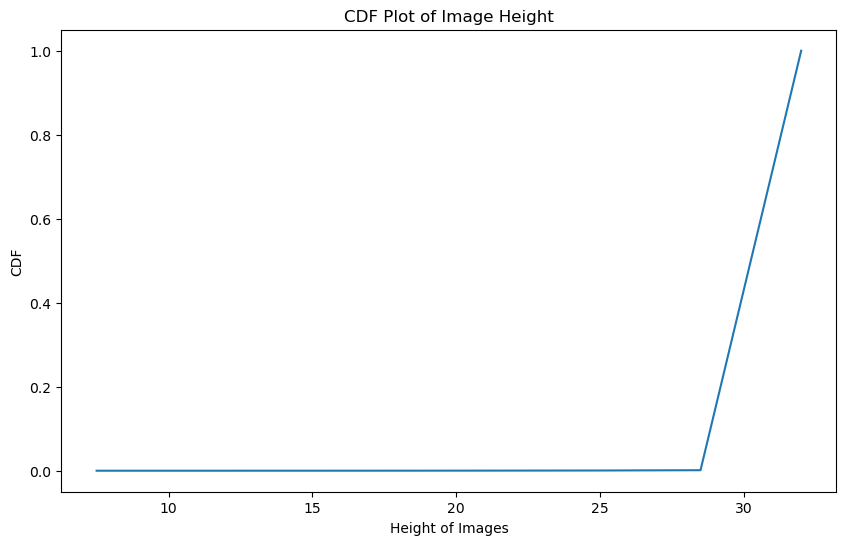

In [93]:
cdf_image_heights(Train_img_size['Height'].values)

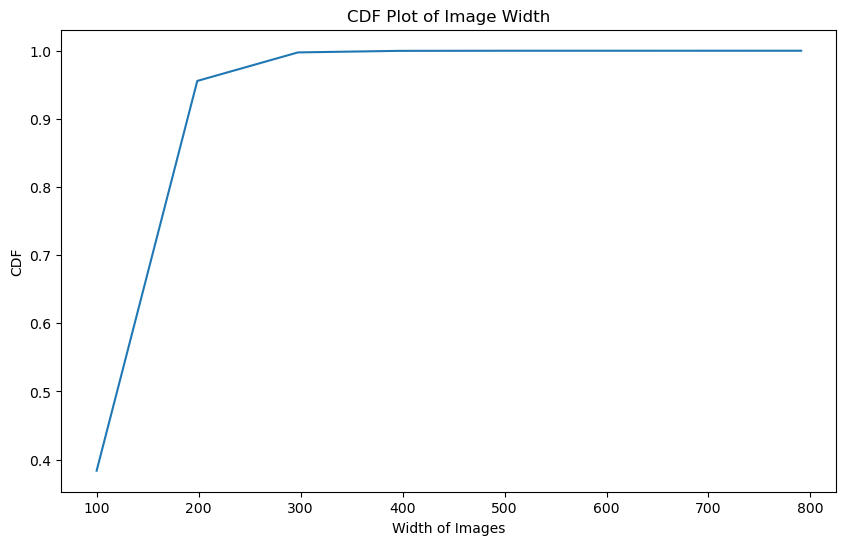

In [94]:
cdf_image_widths(Train_img_size['Width'].values)

As observed in the previous section:

The height for most images is 31 units and 
Nearly 95% of the images have a height of 200 or less.

# CDF plots of Height and Width for Validation Data

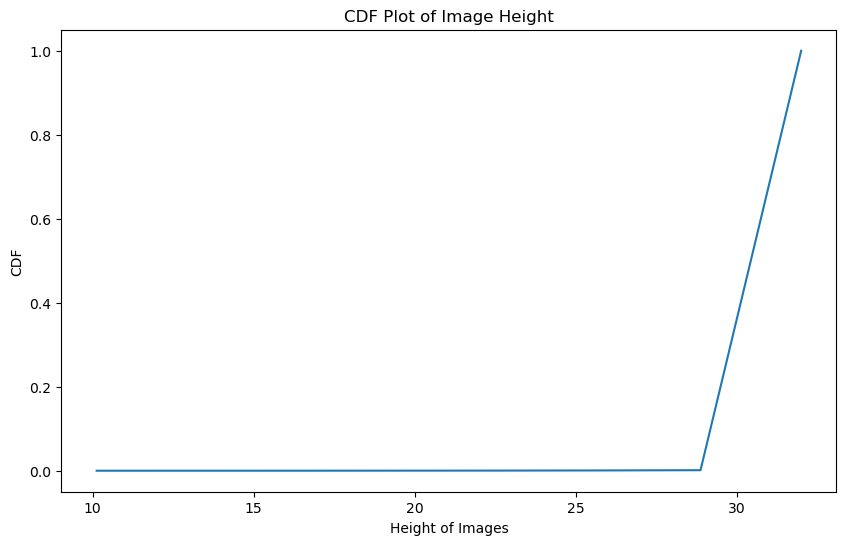

In [95]:
cdf_image_heights(Val_img_size['Height'].values)

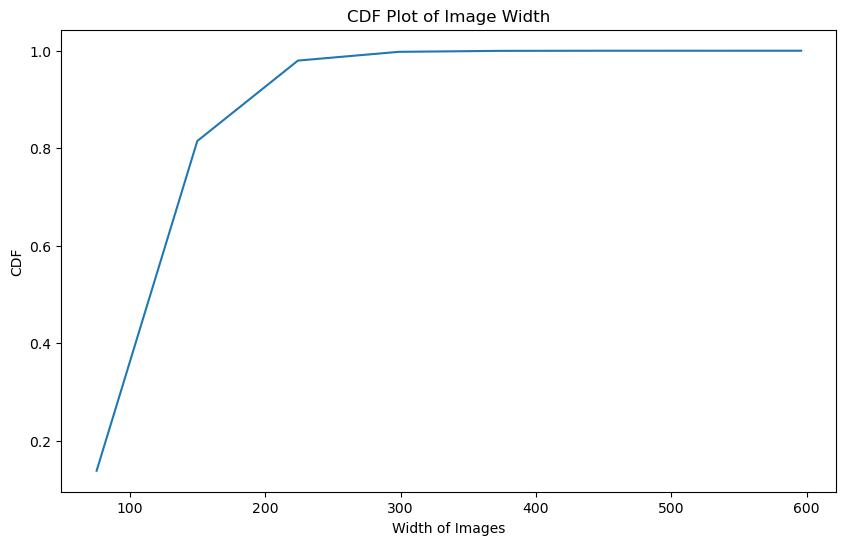

In [96]:
cdf_image_widths(Val_img_size['Width'].values)

The height for most images is 31 units and Nearly 95% of the images have a height of 200 or less.

 # CDF plots of Height and Width for Test Data

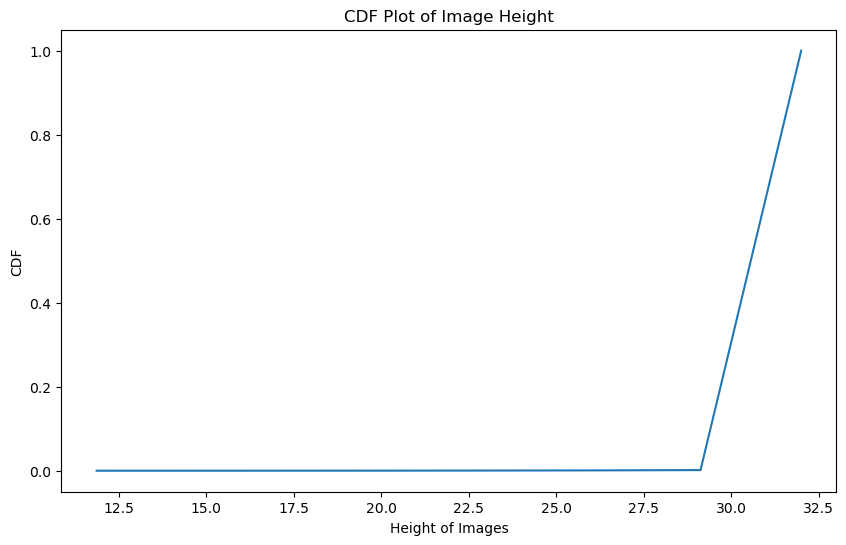

In [97]:
cdf_image_heights(Test_img_size['Height'].values)

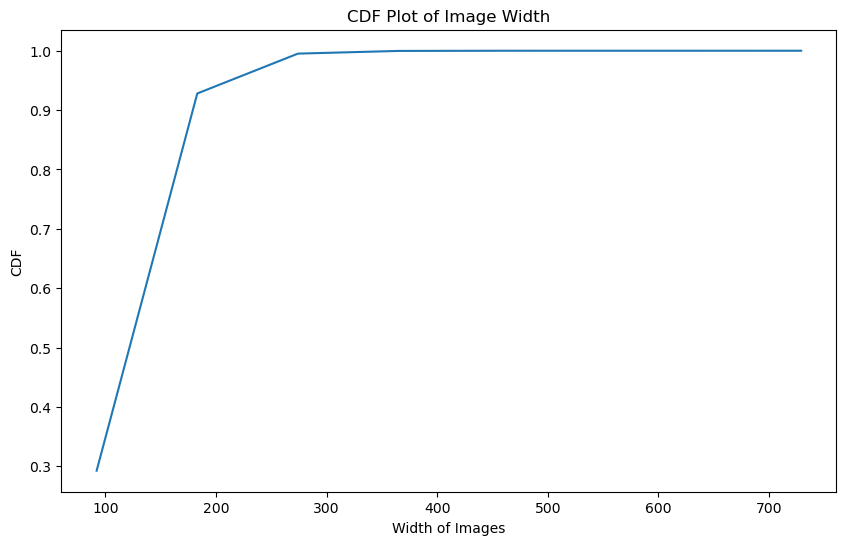

In [98]:
cdf_image_widths(Test_img_size['Width'].values)

Conclusion

Most of the Images have a Height of 31

Almost 95 % of the Images have a width of 200 or less

Based on these observations we can resize the images to 32 (Height) x 170 (Width)

# Label Data Analysis

In [120]:
def pdf_label_lengths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    plt.xlabel('Length of Labels',fontsize=10)
    plt.ylabel('PDF',fontsize=10)
    plt.title('PDF Plot of lengths of Labels',fontsize=12)
    max_len=max(label_len)
    plt.show()
    print('Maximum Length of Label: ',max_len)
    

In [100]:
def cdf_label_lengths(label_len):
    plt.figure(figsize=(10,6))
    count_labels=np.array(label_len)
    counts, bin_edges = np.histogram(count_labels, bins=8, 
                                 density = True)
    pdf = counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],cdf)
    plt.xlabel('Length of Labels',fontsize=10)
    plt.ylabel('CDF',fontsize=10)
    plt.title('CDF Plot of lengths of Labels',fontsize=12)
    plt.show()

In [102]:
def Top_5_lengths_percentage(label_len,counts,total):
    plt.figure(figsize=(10,6))
    indices=np.arange(len(label_len))
    counts=np.array(counts)
    percent=(counts/total)*100
    plt.bar(indices,percent)
    plt.xlabel('Label Lengths',fontsize=10)
    plt.ylabel('Percentages',fontsize=10)
    plt.title('Percentages of Top 5 lengths of Labels',fontsize=12)
    plt.xticks(indices,label_len)
    plt.show()    

In [103]:
def hasDigits(inputText):
    return bool(re.search(r'\d', inputText))

In [145]:
import re


In [105]:
def Digit_count(labels,size):
    present=0
    absent=0
    for i in labels:
        pres=hasDigits(i)
        if pres==True:
            present+=1
        else:
            absent+=1
    present_percent=(present/size)*100
    absent_percent=(absent/size)*100
    print('Labels with Digits: ',present_percent,' %')
    print('Labels without Digits: ',absent_percent,' %')        

# Train data Labels

In [112]:
from collections import Counter

In [130]:
Train_Data=pd.read_csv("TRAIN_DATA_UP.csv")


In [131]:
Train_Data.head()

Unnamed: 0                        Image_path              File_Name  \
0           0    Train_data/100000_workaday.jpg    100000_workaday.jpg   
1           1     Train_data/100001_Clopped.jpg     100001_Clopped.jpg   
2           2  Train_data/100002_frustrated.jpg  100002_frustrated.jpg   
3           3     Train_data/100003_Coastal.jpg     100003_Coastal.jpg   
4           4   Train_data/100004_wehrmacht.jpg   100004_wehrmacht.jpg   

       Labels  
0    workaday  
1     Clopped  
2  frustrated  
3     Coastal  
4   wehrmacht

In [132]:
Train_Data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [133]:
Train_label_len=[len(str(x)) for x in Train_Data['Labels'].values]

In [134]:
Train_label_len[:5]

[8, 7, 10, 7, 9]

In [135]:
Train_label_len_dict=Counter(Train_label_len)

In [136]:
Train_label_len_dict

Counter({8: 160088,
         7: 156485,
         10: 110614,
         9: 140861,
         6: 119476,
         11: 76216,
         12: 46777,
         4: 42698,
         13: 25738,
         5: 77959,
         14: 12185,
         3: 16428,
         2: 4658,
         16: 2220,
         15: 5765,
         18: 234,
         17: 982,
         20: 49,
         1: 399,
         19: 133,
         22: 18,
         21: 10,
         23: 2})

In [137]:
Train_keys = [i for i in sorted(Train_label_len_dict, key=Train_label_len_dict.get, reverse=True)]

In [138]:
Train_keys

[8,
 7,
 9,
 6,
 10,
 5,
 11,
 12,
 4,
 13,
 3,
 14,
 15,
 2,
 16,
 17,
 1,
 18,
 19,
 20,
 22,
 21,
 23]

In [139]:
Train_top_keys=Train_keys[:5]
Train_top_values=[Train_label_len_dict.get(k) for k in Train_top_keys]

In [140]:
Train_top_values

[160088, 156485, 140861, 119476, 110614]

**Train Data Label Lengths PDF**

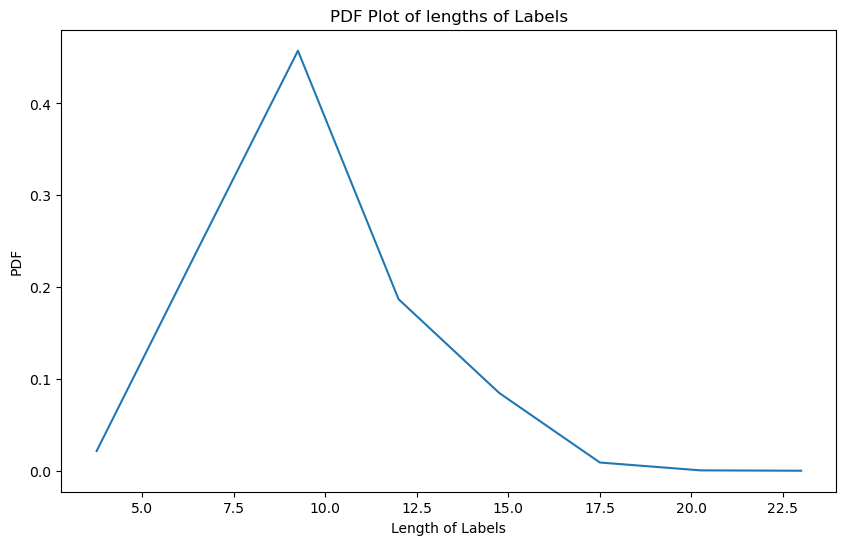

Maximum Length of Label:  23


In [141]:
pdf_label_lengths(Train_label_len)

**obervation** 

Most of the Labels have lengths of 7, 8, and 9 in Train Data

Labels of length 23,22 and 21 are fewer in number

Higher length labels are less frequent compared to many of the lower length labels.



**Train Data Label Lengths CDF Plot**

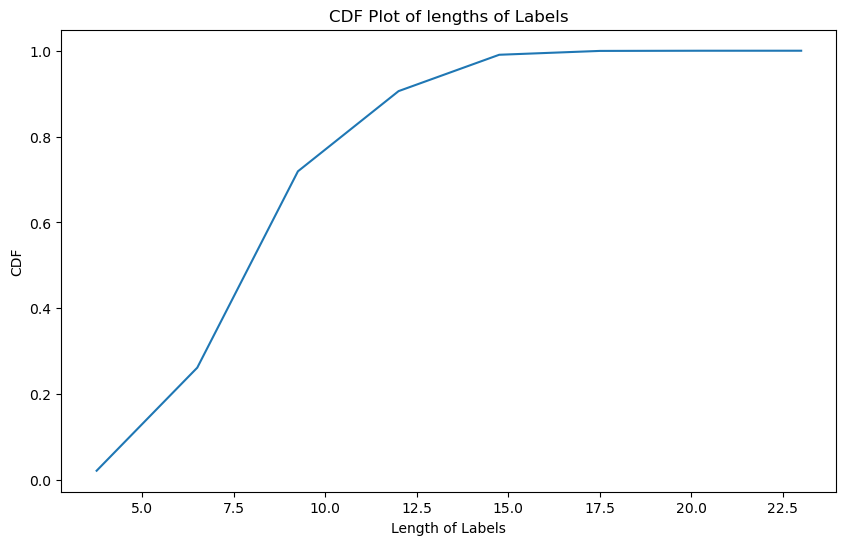

In [142]:
cdf_label_lengths(Train_label_len)

Over 65% of the Labels have length 9 or less

Over 35% of the Labels have a length of 6 or less

**Train Data Top 5 Label Lengths Count(%) Bar Graph**

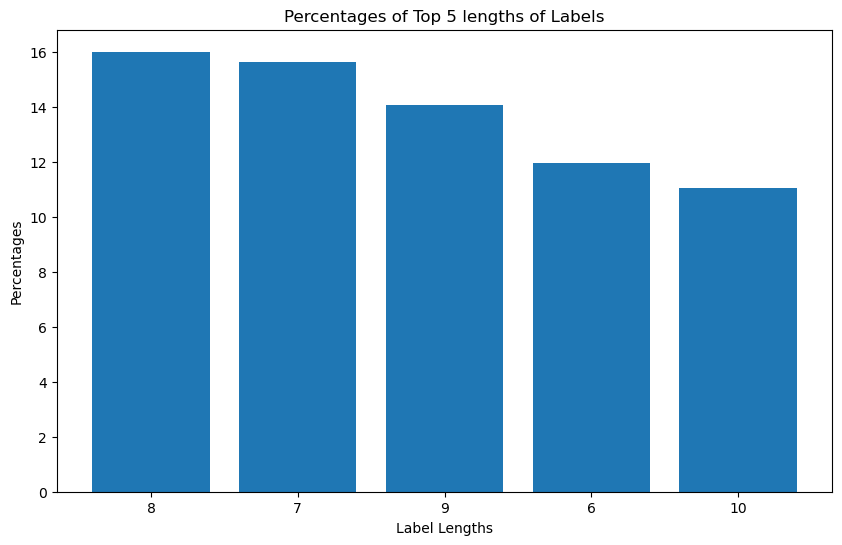

In [143]:
Top_5_lengths_percentage(Train_top_keys,Train_top_values,len(Train_label_len))

Labels with Lengths 7 and 8:
The number of labels with lengths 7 and 8 are almost equal, comprising approximately 16.75% each of the total labels in the Train Data.

Labels with Length 9:
Labels of length 9 comprise approximately 14.8% of the total labels in the Train Data

Labels with Lengths 6 and 10:
The counts of labels with lengths 6 and 10 are almost equal, contributing approximately 12.1% each to the total number of labels

**Train Data Digit Presence Percentage**

In [146]:
Train_labels=[str(x) for x in Train_Data['Labels'].values]
Digit_count(Train_labels,len(Train_labels))

Labels with Digits:  0.19010095050475254  %
Labels without Digits:  99.80989904949524  %


Almost all of the Labels in the Train Data do not have digits present in them comprising 99.809% of total data

Very Few labels in Train Data have digits present with a very less percentage of 0.190% of total data

# Validation Data Labels

In [147]:
Val_Data=pd.read_csv('VAL_DATA_UP.csv')

In [148]:
Val_Data.head()

Unnamed: 0.1  Unnamed: 0                        Image_path  \
0             0           0       Val_data/100000_gripped.jpg   
1             1           1          Val_data/100001_airy.jpg   
2             2           2  Val_data/100002_Annihilating.jpg   
3             3           3     Val_data/100003_Heaviness.jpg   
4             4           4     Val_data/100004_pollsters.jpg   

                 File_Name        Labels  
0       100000_gripped.jpg       gripped  
1          100001_airy.jpg          airy  
2  100002_Annihilating.jpg  Annihilating  
3     100003_Heaviness.jpg     Heaviness  
4     100004_pollsters.jpg     pollsters

In [149]:
Val_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Val_label_len=[len(str(x)) for x in Val_Data['Labels'].values]
Val_label_len_dict=Counter(Val_label_len)
Val_keys = [k for k in sorted(Val_label_len_dict, key=Val_label_len_dict.get, reverse=True)]
Val_top_keys=Val_keys[:5]
Val_top_values=[Val_label_len_dict.get(k) for k in Val_top_keys]

Counter({8: 32253, 7: 31083, 9: 28391, 6: 23964, 10: 21904, 5: 15420, 11: 15216, 12: 9453, 4: 8607, 13: 5083, 3: 3285, 14: 2455, 15: 1120, 2: 969, 16: 427, 17: 200, 1: 80, 18: 48, 19: 28, 20: 9, 22: 3, 21: 1, 23: 1})


In [150]:
Val_label_len_dict

Counter({7: 31083,
         4: 8607,
         12: 9453,
         9: 28391,
         5: 15420,
         11: 15216,
         6: 23964,
         10: 21904,
         8: 32253,
         2: 969,
         13: 5083,
         3: 3285,
         14: 2455,
         16: 427,
         15: 1120,
         17: 200,
         1: 80,
         18: 48,
         19: 28,
         22: 3,
         20: 9,
         21: 1,
         23: 1})

**Validation Data Label Lengths PDF**

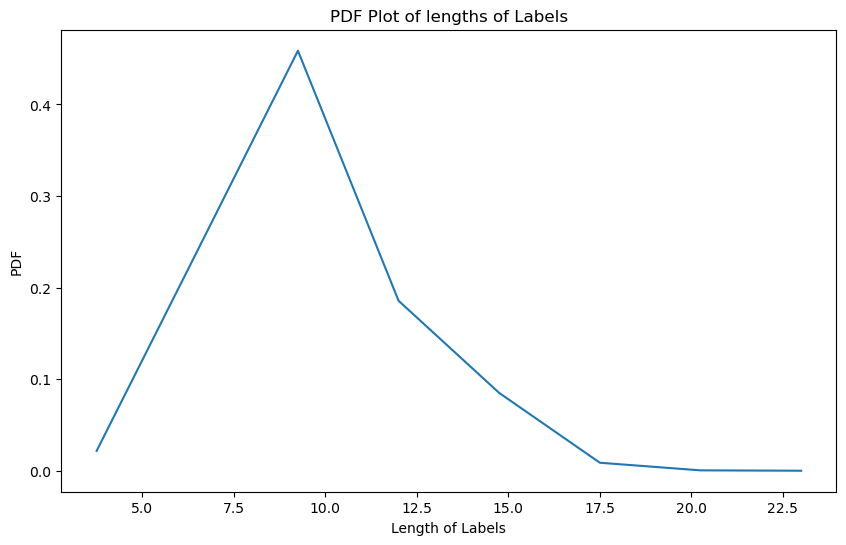

Maximum Length of Label:  23


In [151]:
pdf_label_lengths(Val_label_len)

**Validation Data Label Lengths CDF**

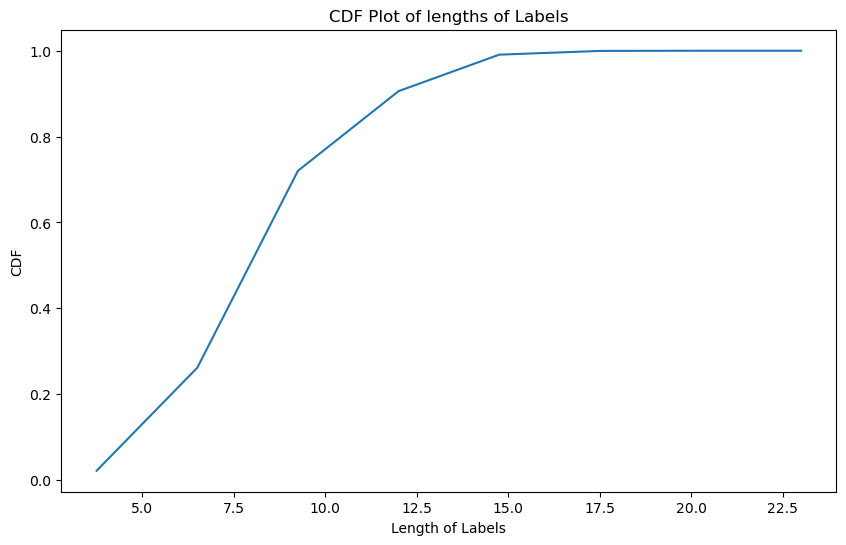

In [152]:
cdf_label_lengths(Val_label_len)

**Validation Data Top 5 Label Lengths Count(%) Bar Graph**

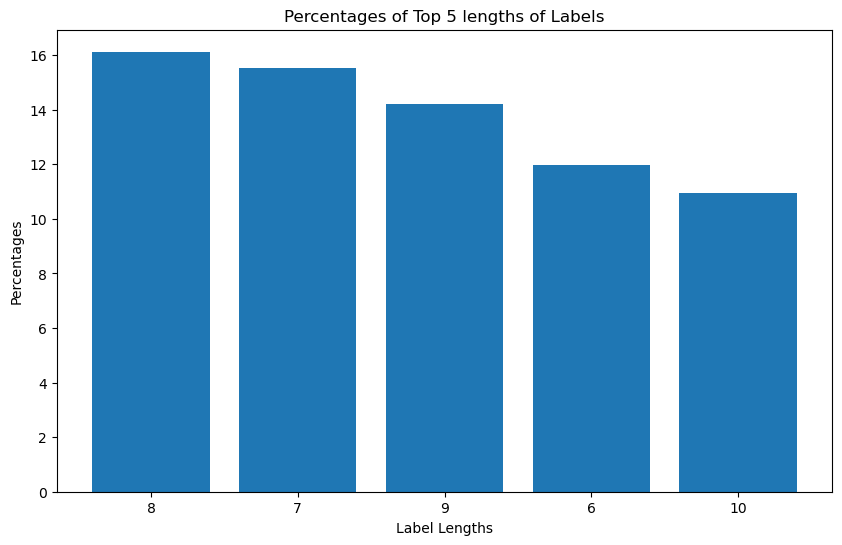

In [153]:
Top_5_lengths_percentage(Val_top_keys,Val_top_values,len(Val_label_len))

**Validation Data Digit Presence Percentage**

In [154]:
Val_labels=[str(x) for x in Val_Data['Labels'].values]
Digit_count(Val_labels,len(Val_labels))

Labels with Digits:  0.186  %
Labels without Digits:  99.81400000000001  %


Labels of Length 7, 8, and 9 are the highest in number among all other labels in the Validation Data

Labels of Length 11 have a higher count than those of Length 12 in the Validation Data

More than 60% of the labels have length less than or equal to 9

The highest number of labels in the Validation Data are of length 8, comprising approximately 16% of the total

Most of Labels found in Validation Data do not have digits present in them with a percentage as high as 99.81% of total data

On the other hand, the percentage of labels with digits is 0.186% of total data, which is very less

# Test Data Labels

In [157]:
Test_Data=pd.read_csv('TEST_DATA_UP.csv')
Test_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Test_label_len=[len(str(x)) for x in Test_Data['Labels'].values]
Test_label_len_dict=Counter(Test_label_len)
Test_keys = [k for k in sorted(Test_label_len_dict, key=Test_label_len_dict.get, reverse=True)]
Test_top_keys=Test_keys[:5]
Test_top_values=[Test_label_len_dict.get(k) for k in Test_top_keys]

In [159]:
Test_label_len_dict

Counter({6: 12041,
         9: 13910,
         8: 16102,
         3: 1663,
         7: 15718,
         5: 7743,
         10: 11156,
         12: 4561,
         11: 7583,
         13: 2647,
         4: 4179,
         14: 1218,
         2: 450,
         15: 623,
         16: 216,
         17: 103,
         18: 24,
         1: 39,
         19: 17,
         20: 5,
         23: 1,
         22: 1})

**Test Data Label Lengths PDF**

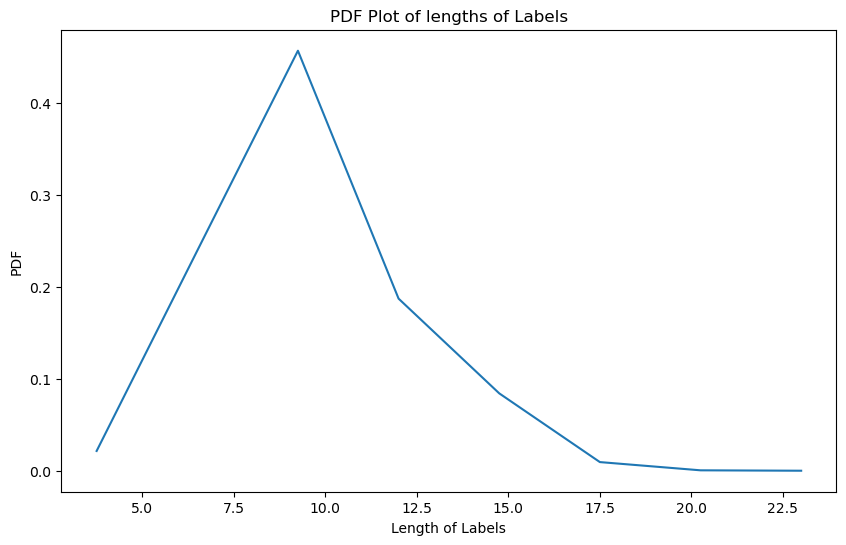

Maximum Length of Label:  23


In [160]:
pdf_label_lengths(Test_label_len)

**Test Data Label Lengths CDF**

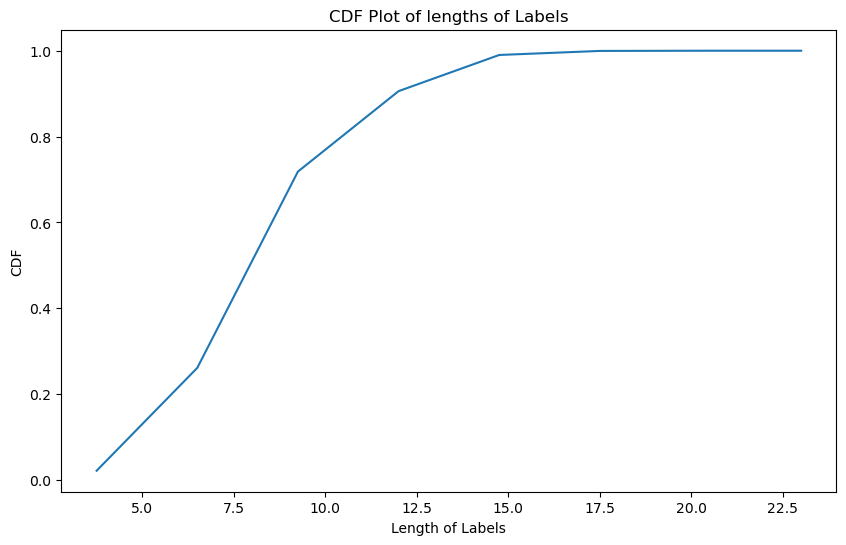

In [161]:
cdf_label_lengths(Test_label_len)

**Test Data Top 5 Label Lengths Count(%) Bar Graph**

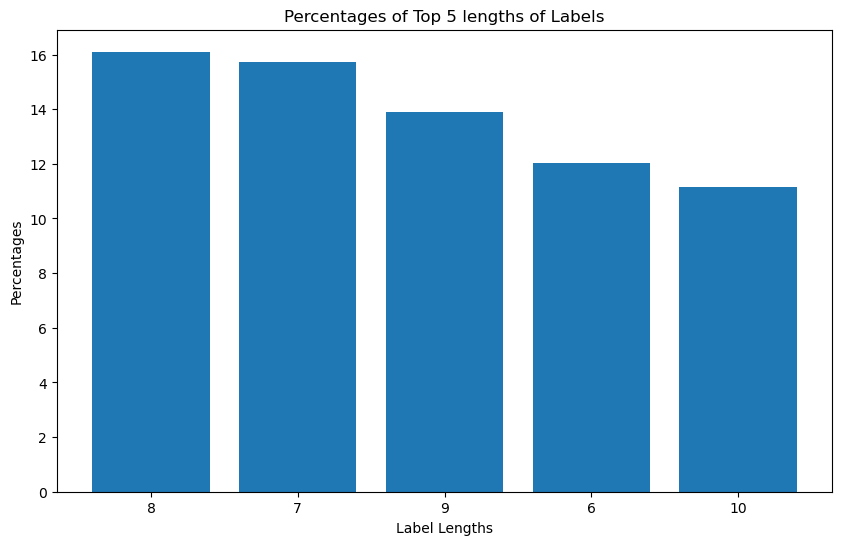

In [162]:
Top_5_lengths_percentage(Test_top_keys,Test_top_values,len(Test_label_len))

**Test Data Digit Presence Percentage**

In [164]:
Test_labels=[str(x) for x in Test_Data['Labels'].values]
Digit_count(Test_labels,len(Test_labels))

Labels with Digits:  0.197  %
Labels without Digits:  99.803  %


The majority of labels have lengths between 6 to 10, with length 8 being the most frequent at 16,102 instances in the dataset.

Labels with lengths 1 to 5 are relatively less frequent. Specifically, there are only 39 labels with a length of 1.

Labels with lengths 11 to 14 show a decreasing trend with increasing length. For instance, while there are 7,583 labels of length 11, there are only 1,218 labels of length 14.

The frequency of labels drastically decreases for lengths greater than 14. There are very few labels with lengths above 17.

The rarest label lengths in the dataset are 22 and 23, each with just a single occurrence.

While most labels have lengths ranging from 6 to 10, there's a noticeable presence of labels with lengths 7, 8, and 9, with counts of 15,718, 16,102, and 13,910 respectively

# Label Letters Data Analysis

In [165]:
Train_Data=pd.read_csv('TRAIN_DATA_UP.csv')
Train_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Train_Data.to_csv("TRAIN_DATA_FINAL.csv")

Val_Data=pd.read_csv('VAL_DATA_UP.csv')
Val_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Val_Data.to_csv("VAL_DATA_FINAL.csv")

Test_Data=pd.read_csv('TEST_DATA_UP.csv')
Test_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Test_Data.to_csv("TEST_DATA_FINAL.csv")

In [166]:
Train_Data=pd.read_csv('TRAIN_DATA_FINAL.csv')
Val_Data=pd.read_csv('VAL_DATA_FINAL.csv')
Test_Data=pd.read_csv('TEST_DATA_FINAL.csv')

In [168]:
Train_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Val_Data.drop(['Unnamed: 0'],axis=1,inplace=True)
Test_Data.drop(['Unnamed: 0'],axis=1,inplace=True)


In [171]:
Train_Data.head()

Image_path              File_Name      Labels
0    Train_data/100000_workaday.jpg    100000_workaday.jpg    workaday
1     Train_data/100001_Clopped.jpg     100001_Clopped.jpg     Clopped
2  Train_data/100002_frustrated.jpg  100002_frustrated.jpg  frustrated
3     Train_data/100003_Coastal.jpg     100003_Coastal.jpg     Coastal
4   Train_data/100004_wehrmacht.jpg   100004_wehrmacht.jpg   wehrmacht

In [169]:
letters='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
Train_labels_combined=' '.join([str(x) for x in Train_Data['Labels'].values])
Val_labels_combined=' '.join([str(x) for x in Val_Data['Labels'].values])
Test_labels_combined=' '.join([str(x) for x in Test_Data['Labels'].values])

In [170]:
Train_labels_combined

'workaday Clopped frustrated Coastal wehrmacht sneered Wodges ringleaders Hegira INFATUATES BOPPING Amalgamating SAHARAN Baselines QUANDARIES Cunard boyd CAGING proust perverts Twelves REALER Unfashionably Austerest CORPULENT Identified vouchsafes undressed deranged Trundling LOVABLY Chortle disappointed HERE rockers Railroader Rubiest SPHEROIDAL Missal woodchucks miami agitate RESULTANT Cowhands MENTIONING quickening SHADING Bobbie Statuary vivarium Lagrangian ROUTINIZING romanticized coined inclement midwifes yanked Armour Earthward fearing INTERN ABRAM PERNICIOUS monstrous gleeful SLOOP accelerating hurries Dismaying Lateraled Disposal FRATRICIDE CRATER MENIALS TRAP Kempis rehousing PARABOLAS TRANSPARENCIES VELVET Brawnier crushes pertain basinful ROOMFULS pinpricks Brailles Outspending Dodgems harpooned JAILING Manhunts Spics SKIMMED map pursuers crazily postulates COMMENCEMENT turnings Frieze egresses Obverses KURDISH ITHACA Thaddeus STRINGERS evocation proverb Hypothesized Scanda

In [172]:
def letters_list(letter,combined_labels):
    letter_list=[]
    for i in range(len(letter)):
        if letter[i] in combined_labels:
            letter_list.append(letter[i])
    return letter_list

In [173]:
Train_letter_set=set(letters_list(letters,Train_labels_combined))
Val_letter_set=set(letters_list(letters,Val_labels_combined))
Test_letter_set=set(letters_list(letters,Test_labels_combined))

In [175]:
Train_letter_set

{'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z'}

In [174]:
print("Number of unique Letters in Train Data: ",len(Train_letter_set))
print("Number of unique Letters in Validation Data: ",len(Val_letter_set))
print("Number of unique Letters in Test Data: ",len(Test_letter_set))

Number of unique Letters in Train Data:  26
Number of unique Letters in Validation Data:  26
Number of unique Letters in Test Data:  26


**Observation**
All Letters in the alphabet are present in each of Train, Validation and Test Data

#### Label Data Analysis Summary

All of the Top 5 Label lengths present in Train, Validation and Test Data are same with Top 5 Label lengths being 8,7,9,6,10

The Distribution of Data in the Digit Presence in Labels perspective is uniform across Train, Validation and Test Data, each comprising almost 99% of Labels without digits in them

Top 2 Label Lengths are 8 , 7 across Train, Validation and Test Data

These Factors ensure that some properties related to Labels in each of Train, Validation and Test Data are same and uniform

### Conclusions from Data Analysis

 Most of the Images around 90 % have height 32 and width less than 170
 
 Most of the Labels present have lengths 7 ,8 and 9
 
 Based on this we can re-size the images to 32 (Height) X 170 (Width)